In [ ]:
#1. IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [ ]:
#2. IMPORT TEST DATA
slowdown_data = pd.read_csv(
    "/tensorflow-1.15.2/CAR3_slowdown_squaretrack.csv")
slowdown_data


,LS1,LS2,LS3,LS4,LS5,BSL,BSR,LMS,RMS,GYROX,GYROY,GYROZ,ACCELX,ACCELY,ACCELZ,MAGX,MAGY,MAGZ
0,874,683,1131,2241,846,0,0,152,122,5,-15,-20,-63,15,1075,-750,-109,-1031
1,886,1278,1830,2204,1458,0,0,149,123,7,-11,-25,-58,-29,1044,-1042,-101,-959
2,892,726,1264,2269,861,0,0,146,135,3,-7,-8,-26,-14,995,-1059,-162,-986
3,885,720,1248,2382,1321,0,0,149,104,6,-23,-24,-52,-49,1042,-1086,-253,-995
4,865,689,1083,2335,1075,0,0,149,92,6,-3,-46,-45,26,1030,-967,-385,-960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,918,716,805,2053,922,0,0,86,68,3,-9,-17,-18,-12,1017,-950,-1160,-118
66,937,725,730,1839,1053,0,0,78,41,4,-7,-27,-6,-10,1027,-1058,-1069,-77
67,918,716,807,2087,922,0,0,84,62,4,-8,-15,1,-19,1019,-1209,-981,-229
68,915,740,1042,2119,1187,0,0,95,82,2,-6,-13,-7,-6,1018,-1273,-971,-214


In [ ]:
#3. IMPORT TRAINING DATA
normal_data = pd.read_csv("/tensorflow-1.15.2/CAR1_10MINS_SAMPLE1_squaretrack.csv")
normal_data

,LS1,LS2,LS3,LS4,LS5,BSL,BSR,LMS,RMS,GYROX,GYROY,GYROZ,ACCELX,ACCELY,ACCELZ,MAGX,MAGY,MAGZ
0,845,648,967,1895,915,0,0,132,66,6,-4,-42,-20,-9,1013,-304,-297,-493
1,855,1356,1941,1860,1692,0,0,140,118,4,0,-22,-16,18,1031,-332,-366,-502
2,842,666,1115,1974,1200,0,0,138,101,6,-8,-30,-32,-33,991,-365,-464,-549
3,873,727,1532,2212,1439,0,0,139,125,3,-11,-9,-2,10,1037,-349,-593,-502
4,831,626,793,1821,937,0,0,137,63,6,0,-54,-27,27,1013,-36,-663,-521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,814,620,782,1726,1002,0,0,142,57,6,-20,-63,-31,-8,1045,60,-447,-671
495,841,1438,2072,1659,853,0,0,146,138,4,-8,-8,-9,10,1011,-18,-369,-624
496,834,1137,1308,1584,1385,0,0,148,99,7,0,-35,5,-4,971,22,-372,-511
497,847,1203,1052,1423,853,0,0,125,115,5,-3,-10,-45,35,1039,65,-356,-479


LINE SENSOR 1 TRAINING DATA  


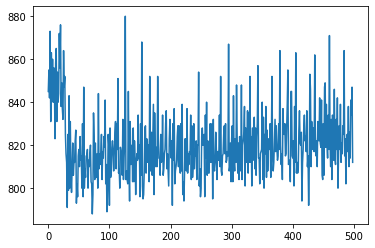

LINE SENSOR 2 TRAINING DATA  


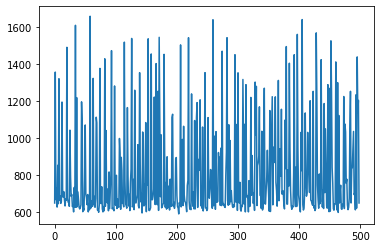

LINE SENSOR 3 TRAINING DATA  


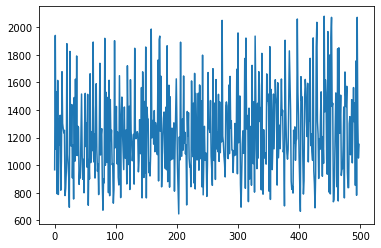

LINE SENSOR 4 TRAINING DATA  


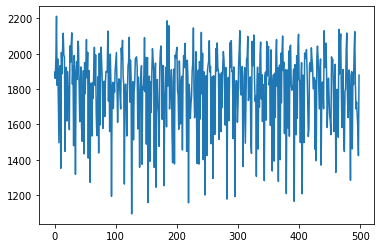

LINE SENSOR 5 TRAINING DATA  


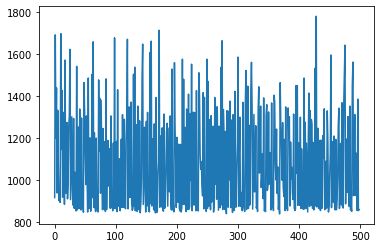

BUMPER SENSOR 1 TRAINING DATA  


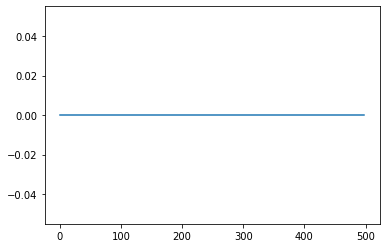

BUMPER SENSOR 2 TRAINING DATA  


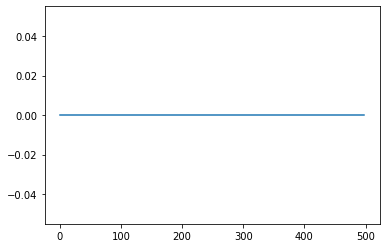

SPEED SENSOR LEFT TRAINING DATA  


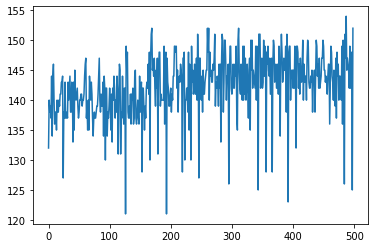

SPEED SENSOR RIGHT TRAINING DATA  


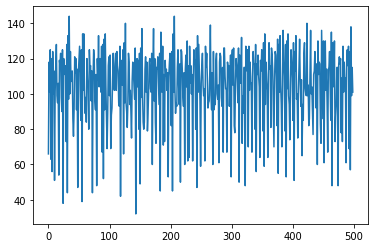

GYRO X-AXIS TRAINING DATA  


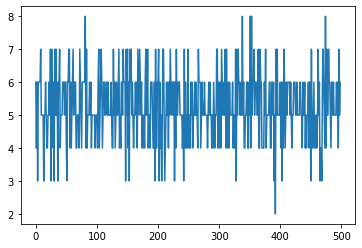

GYRO Y-AXIS TRAINING DATA  


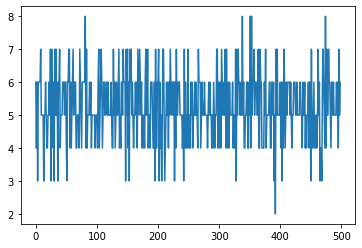

GYRO Z-AXIS TRAINING DATA  


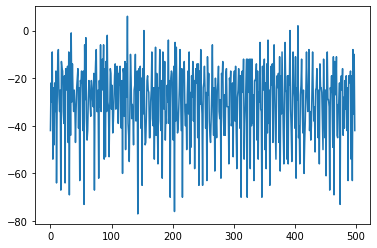

ACCEL X-AXIS TRAINING DATA  


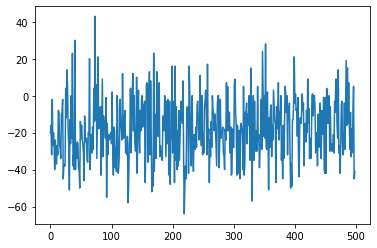

ACCEL Y-AXIS TRAINING DATA  


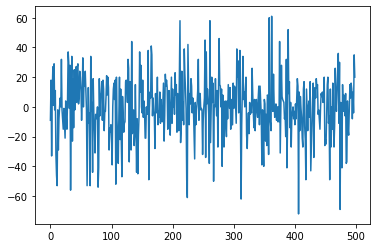

ACCEL Z-AXIS TRAINING DATA  


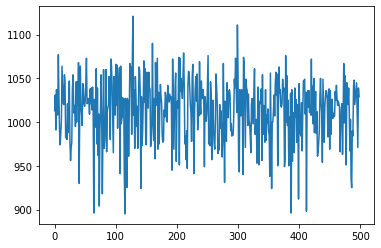

MAG X-AXIS TRAINING DATA 


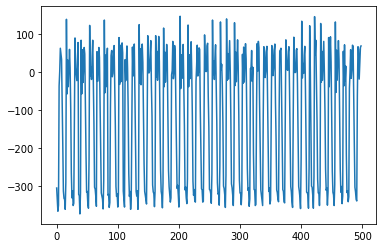

MAG Y-AXIS TRAINING DATA  


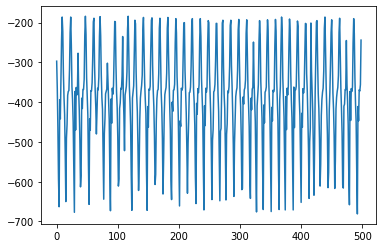

MAG Z-AXIS TRAINING DATA  


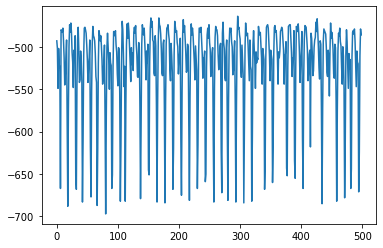

In [ ]:
#4. EXTRACT LEFT AND RIGHT MOTOR DATA FROM TEST AND TRAINING DATA

normal_len=normal_data.shape[0]
faulty_len=slowdown_data.shape[0]

##########################################################################################
#TRAINING DATA SPLIT SERIES
LINE_SENSOR1_TRAINING_DATA=normal_data.LS1[0:normal_len]
LINE_SENSOR2_TRAINING_DATA=normal_data.LS2[0:normal_len]
LINE_SENSOR3_TRAINING_DATA=normal_data.LS3[0:normal_len]
LINE_SENSOR4_TRAINING_DATA=normal_data.LS4[0:normal_len]
LINE_SENSOR5_TRAINING_DATA=normal_data.LS5[0:normal_len]

BUMPER_SENSOR1_TRAINING_DATA=normal_data.BSL[0:normal_len]
BUMPER_SENSOR2_TRAINING_DATA=normal_data.BSR[0:normal_len]

LEFT_SPEED_SENSOR_TRAINING_DATA=normal_data.LMS[0:normal_len]
RIGHT_SPEED_SENSOR_TRAINING_DATA=normal_data.RMS[0:normal_len]

GYROX_TRAINING_DATA=normal_data.GYROX[0:normal_len]
GYROY_TRAINING_DATA=normal_data.GYROX[0:normal_len]
GYROZ_TRAINING_DATA=normal_data.GYROZ[0:normal_len]

ACCELX_TRAINING_DATA=normal_data.ACCELX[0:normal_len]
ACCELY_TRAINING_DATA=normal_data.ACCELY[0:normal_len]
ACCELZ_TRAINING_DATA=normal_data.ACCELZ[0:normal_len]

MAGX_TRAINING_DATA=normal_data.MAGX[0:normal_len]
MAGY_TRAINING_DATA=normal_data.MAGY[0:normal_len]
MAGZ_TRAINING_DATA=normal_data.MAGZ[0:normal_len]

######################################################################################
# TEST DATA SPLIT SERIES
LINE_SENSOR1_TEST_DATA=slowdown_data.LS1[0:faulty_len]
LINE_SENSOR2_TEST_DATA=slowdown_data.LS2[0:faulty_len]
LINE_SENSOR3_TEST_DATA=slowdown_data.LS3[0:faulty_len]
LINE_SENSOR4_TEST_DATA=slowdown_data.LS4[0:faulty_len]
LINE_SENSOR5_TEST_DATA=slowdown_data.LS5[0:faulty_len]

BUMPER_SENSOR1_TEST_DATA=slowdown_data.BSL[0:faulty_len]
BUMPER_SENSOR2_TEST_DATA=slowdown_data.BSR[0:faulty_len]

LEFT_SPEED_SENSOR_TEST_DATA=slowdown_data.LMS[0:faulty_len]
RIGHT_SPEED_SENSOR_TEST_DATA=slowdown_data.RMS[0:faulty_len]

GYROX_TEST_DATA=slowdown_data.GYROX[0:faulty_len]
GYROY_TEST_DATA=slowdown_data.GYROX[0:faulty_len]
GYROZ_TEST_DATA=slowdown_data.GYROZ[0:faulty_len]

ACCELX_TEST_DATA=slowdown_data.ACCELX[0:faulty_len]
ACCELY_TEST_DATA=slowdown_data.ACCELY[0:faulty_len]
ACCELZ_TEST_DATA=slowdown_data.ACCELZ[0:faulty_len]

MAGX_TEST_DATA=slowdown_data.MAGX[0:faulty_len]
MAGY_TEST_DATA=slowdown_data.MAGY[0:faulty_len]
MAGZ_TEST_DATA=slowdown_data.MAGZ[0:faulty_len]

######################################################################################
# TRAINING DATA NP ARRAYS
LINE_SENSOR1_TRAINING_DATA_NP_ARRAY=np.array(LINE_SENSOR1_TRAINING_DATA);
LINE_SENSOR2_TRAINING_DATA_NP_ARRAY=np.array(LINE_SENSOR2_TRAINING_DATA);
LINE_SENSOR3_TRAINING_DATA_NP_ARRAY=np.array(LINE_SENSOR3_TRAINING_DATA);
LINE_SENSOR4_TRAINING_DATA_NP_ARRAY=np.array(LINE_SENSOR4_TRAINING_DATA);
LINE_SENSOR5_TRAINING_DATA_NP_ARRAY=np.array(LINE_SENSOR5_TRAINING_DATA);

BUMPER_SENSOR1_TRAINING_DATA_NP_ARRAY=np.array(BUMPER_SENSOR1_TRAINING_DATA);
BUMPER_SENSOR2_TRAINING_DATA_NP_ARRAY=np.array(BUMPER_SENSOR2_TRAINING_DATA);

LEFT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY=np.array(LEFT_SPEED_SENSOR_TRAINING_DATA);
RIGHT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY=np.array(RIGHT_SPEED_SENSOR_TRAINING_DATA);

GYROX_TRAINING_DATA_NP_ARRAY=np.array(GYROX_TRAINING_DATA);
GYROY_TRAINING_DATA_NP_ARRAY=np.array(GYROY_TRAINING_DATA);
GYROZ_TRAINING_DATA_NP_ARRAY=np.array(GYROZ_TRAINING_DATA);

ACCELX_TRAINING_DATA_NP_ARRAY=np.array(ACCELX_TRAINING_DATA);
ACCELY_TRAINING_DATA_NP_ARRAY=np.array(ACCELY_TRAINING_DATA);
ACCELZ_TRAINING_DATA_NP_ARRAY=np.array(ACCELZ_TRAINING_DATA);

MAGX_TRAINING_DATA_NP_ARRAY=np.array(MAGX_TRAINING_DATA);
MAGY_TRAINING_DATA_NP_ARRAY=np.array(MAGY_TRAINING_DATA);
MAGZ_TRAINING_DATA_NP_ARRAY=np.array(MAGZ_TRAINING_DATA);

######################################################################################
# TEST DATA NP ARRAYS
LINE_SENSOR1_TEST_DATA_NP_ARRAY=np.array(LINE_SENSOR1_TEST_DATA);
LINE_SENSOR2_TEST_DATA_NP_ARRAY=np.array(LINE_SENSOR2_TEST_DATA);
LINE_SENSOR3_TEST_DATA_NP_ARRAY=np.array(LINE_SENSOR3_TEST_DATA);
LINE_SENSOR4_TEST_DATA_NP_ARRAY=np.array(LINE_SENSOR4_TEST_DATA);
LINE_SENSOR5_TEST_DATA_NP_ARRAY=np.array(LINE_SENSOR5_TEST_DATA);

BUMPER_SENSOR1_TEST_DATA_NP_ARRAY=np.array(BUMPER_SENSOR1_TEST_DATA);
BUMPER_SENSOR2_TEST_DATA_NP_ARRAY=np.array(BUMPER_SENSOR2_TEST_DATA);

LEFT_SPEED_SENSOR_TEST_DATA_NP_ARRAY=np.array(LEFT_SPEED_SENSOR_TEST_DATA);
RIGHT_SPEED_SENSOR_TEST_DATA_NP_ARRAY=np.array(RIGHT_SPEED_SENSOR_TEST_DATA);

GYROX_TEST_DATA_NP_ARRAY=np.array(GYROX_TEST_DATA);
GYROY_TEST_DATA_NP_ARRAY=np.array(GYROY_TEST_DATA);
GYROZ_TEST_DATA_NP_ARRAY=np.array(GYROZ_TEST_DATA);

ACCELX_TEST_DATA_NP_ARRAY=np.array(ACCELX_TEST_DATA);
ACCELY_TEST_DATA_NP_ARRAY=np.array(ACCELY_TEST_DATA);
ACCELZ_TEST_DATA_NP_ARRAY=np.array(ACCELZ_TEST_DATA);

MAGX_TEST_DATA_NP_ARRAY=np.array(MAGX_TEST_DATA);
MAGY_TEST_DATA_NP_ARRAY=np.array(MAGY_TEST_DATA);
MAGZ_TEST_DATA_NP_ARRAY=np.array(MAGZ_TEST_DATA);

#######################################################################################

# INDEPENDANT PLOTS OF TRAINING AND TEST DATA

#TRAINING DATA
##########################################

fig, ax = plt.subplots()

plt.title='LINE SENSOR 1 TRAINING DATA  '
print(plt.title)
LINE_SENSOR1_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 2 TRAINING DATA  '
print(plt.title)
LINE_SENSOR2_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 3 TRAINING DATA  '
print(plt.title)
LINE_SENSOR3_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 4 TRAINING DATA  '
print(plt.title)
LINE_SENSOR4_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 5 TRAINING DATA  '
print(plt.title)
LINE_SENSOR5_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

##################################################################

fig, ax = plt.subplots()

plt.title='BUMPER SENSOR 1 TRAINING DATA  '
print(plt.title)
BUMPER_SENSOR1_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='BUMPER SENSOR 2 TRAINING DATA  '
print(plt.title)
BUMPER_SENSOR2_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()


###################################################################

fig, ax = plt.subplots()

plt.title='SPEED SENSOR LEFT TRAINING DATA  '
print(plt.title)
LEFT_SPEED_SENSOR_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='SPEED SENSOR RIGHT TRAINING DATA  '
print(plt.title)
RIGHT_SPEED_SENSOR_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

#####################################################################

fig, ax = plt.subplots()

plt.title='GYRO X-AXIS TRAINING DATA  '
print(plt.title)
GYROX_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='GYRO Y-AXIS TRAINING DATA  '
print(plt.title)
GYROY_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='GYRO Z-AXIS TRAINING DATA  '
print(plt.title)
GYROZ_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

######################################################
fig, ax = plt.subplots()

plt.title='ACCEL X-AXIS TRAINING DATA  '
print(plt.title)
ACCELX_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='ACCEL Y-AXIS TRAINING DATA  '
print(plt.title)
ACCELY_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='ACCEL Z-AXIS TRAINING DATA  '
print(plt.title)
ACCELZ_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

#######################################################################
fig, ax = plt.subplots()

plt.title='MAG X-AXIS TRAINING DATA '
print(plt.title)
MAGX_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='MAG Y-AXIS TRAINING DATA  '
print(plt.title)
MAGY_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='MAG Z-AXIS TRAINING DATA  '
print(plt.title)
MAGZ_TRAINING_DATA.plot(legend=False, ax=ax)

plt.show()

#############################################################################







LINE SENSOR 1 TEST DATA  


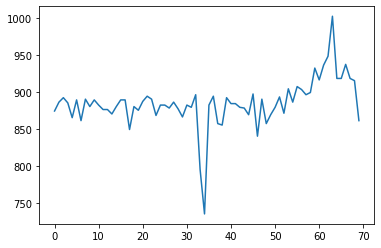

LINE SENSOR 2 TEST DATA  


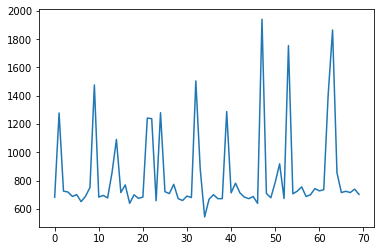

LINE SENSOR 3 TEST DATA  


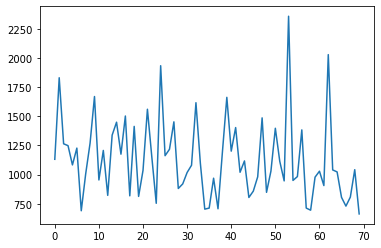

LINE SENSOR 4 TEST DATA  


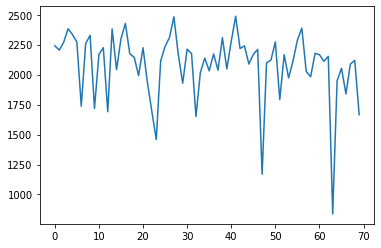

LINE SENSOR 5 TEST DATA  


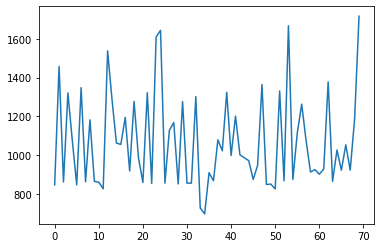

BUMPER SENSOR 1 TEST DATA  


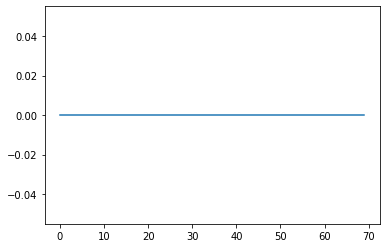

BUMPER SENSOR 2 TEST DATA  


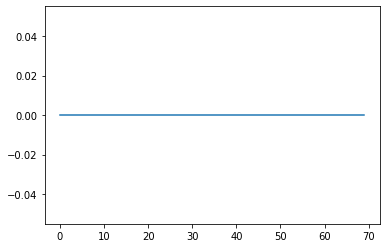

SPEED SENSOR LEFT TEST DATA  


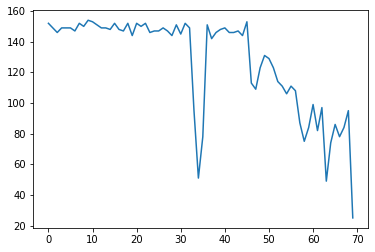

SPEED SENSOR RIGHT TEST DATA  


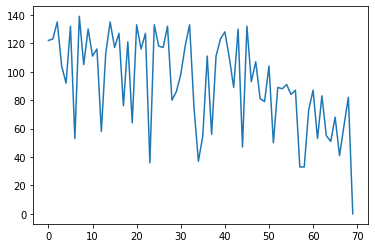

GYRO X-AXIS TEST DATA  


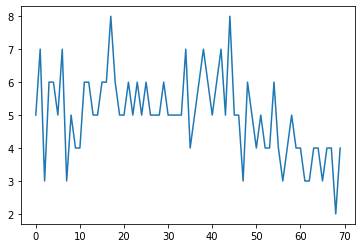

GYRO Y-AXIS TEST DATA  


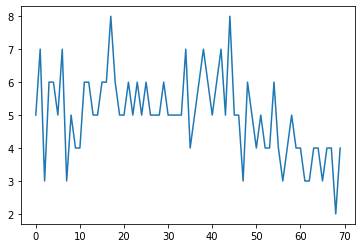

GYRO Z-AXIS TEST DATA  


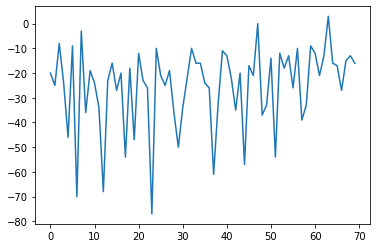

ACCEL X-AXIS TEST DATA  


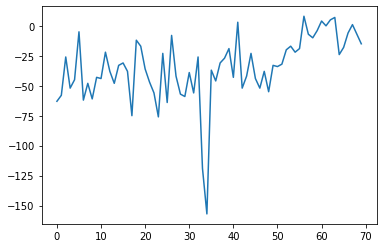

ACCEL Y-AXIS TEST DATA  


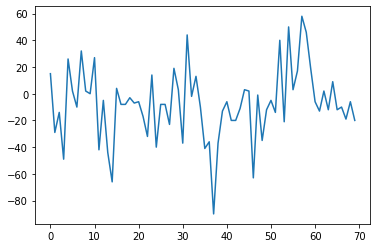

ACCEL Z-AXIS TEST DATA  


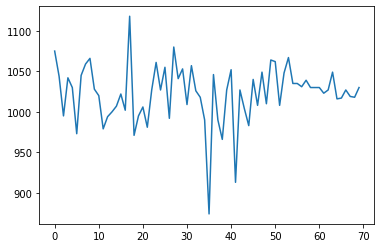

MAG X-AXIS TEST DATA 


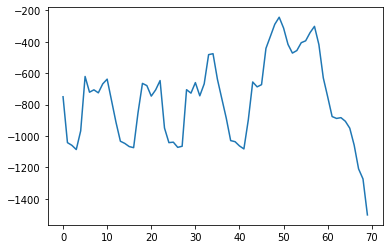

MAG Y-AXIS TEST DATA  


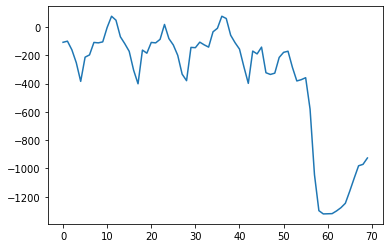

MAG Z-AXIS TEST DATA  


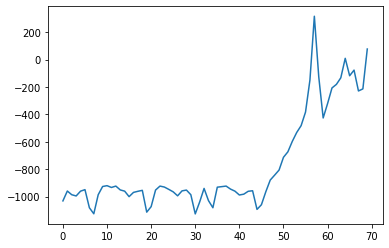

In [ ]:
# INDEPENDANT PLOTS OF TEST DATA

#TRAINING DATA
##########################################

fig, ax = plt.subplots()

plt.title='LINE SENSOR 1 TEST DATA  '
print(plt.title)
LINE_SENSOR1_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 2 TEST DATA  '
print(plt.title)
LINE_SENSOR2_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 3 TEST DATA  '
print(plt.title)
LINE_SENSOR3_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 4 TEST DATA  '
print(plt.title)
LINE_SENSOR4_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='LINE SENSOR 5 TEST DATA  '
print(plt.title)
LINE_SENSOR5_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

##################################################################

fig, ax = plt.subplots()

plt.title='BUMPER SENSOR 1 TEST DATA  '
print(plt.title)
BUMPER_SENSOR1_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='BUMPER SENSOR 2 TEST DATA  '
print(plt.title)
BUMPER_SENSOR2_TEST_DATA.plot(legend=False, ax=ax)

plt.show()


###################################################################

fig, ax = plt.subplots()

plt.title='SPEED SENSOR LEFT TEST DATA  '
print(plt.title)
LEFT_SPEED_SENSOR_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='SPEED SENSOR RIGHT TEST DATA  '
print(plt.title)
RIGHT_SPEED_SENSOR_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

#####################################################################

fig, ax = plt.subplots()

plt.title='GYRO X-AXIS TEST DATA  '
print(plt.title)
GYROX_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='GYRO Y-AXIS TEST DATA  '
print(plt.title)
GYROY_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='GYRO Z-AXIS TEST DATA  '
print(plt.title)
GYROZ_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

######################################################
fig, ax = plt.subplots()

plt.title='ACCEL X-AXIS TEST DATA  '
print(plt.title)
ACCELX_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='ACCEL Y-AXIS TEST DATA  '
print(plt.title)
ACCELY_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='ACCEL Z-AXIS TEST DATA  '
print(plt.title)
ACCELZ_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

#######################################################################
fig, ax = plt.subplots()

plt.title='MAG X-AXIS TEST DATA '
print(plt.title)
MAGX_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='MAG Y-AXIS TEST DATA  '
print(plt.title)
MAGY_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

fig, ax = plt.subplots()

plt.title='MAG Z-AXIS TEST DATA  '
print(plt.title)
MAGZ_TEST_DATA.plot(legend=False, ax=ax)

plt.show()

#############################################################################




In [ ]:
#5. NORMALIZE TRAINING AND TEST DATA

# TRAINING DATA NP ARRAYS
LINE_SENSOR1_TRAINING_DATA_NP_ARRAY=LINE_SENSOR1_TRAINING_DATA_NP_ARRAY/5000;
LINE_SENSOR2_TRAINING_DATA_NP_ARRAY=LINE_SENSOR2_TRAINING_DATA_NP_ARRAY/5000;
LINE_SENSOR3_TRAINING_DATA_NP_ARRAY=LINE_SENSOR3_TRAINING_DATA_NP_ARRAY/5000;
LINE_SENSOR4_TRAINING_DATA_NP_ARRAY=LINE_SENSOR4_TRAINING_DATA_NP_ARRAY/5000;
LINE_SENSOR5_TRAINING_DATA_NP_ARRAY=LINE_SENSOR5_TRAINING_DATA_NP_ARRAY/5000;

BUMPER_SENSOR1_TRAINING_DATA_NP_ARRAY=BUMPER_SENSOR1_TRAINING_DATA_NP_ARRAY/5;
BUMPER_SENSOR2_TRAINING_DATA_NP_ARRAY=BUMPER_SENSOR2_TRAINING_DATA_NP_ARRAY/5;

LEFT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY=LEFT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY/1000;
RIGHT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY=LEFT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY/1000;

GYROX_TRAINING_DATA_NP_ARRAY=GYROX_TRAINING_DATA_NP_ARRAY/65536;
GYROY_TRAINING_DATA_NP_ARRAY=GYROY_TRAINING_DATA_NP_ARRAY/65536;
GYROZ_TRAINING_DATA_NP_ARRAY=GYROZ_TRAINING_DATA_NP_ARRAY/65536;

ACCELX_TRAINING_DATA_NP_ARRAY=ACCELX_TRAINING_DATA_NP_ARRAY/65536;
ACCELY_TRAINING_DATA_NP_ARRAY=ACCELY_TRAINING_DATA_NP_ARRAY/65536;
ACCELZ_TRAINING_DATA_NP_ARRAY=ACCELZ_TRAINING_DATA_NP_ARRAY/65536;

MAGX_TRAINING_DATA_NP_ARRAY=MAGX_TRAINING_DATA_NP_ARRAY/65536;
MAGY_TRAINING_DATA_NP_ARRAY=MAGY_TRAINING_DATA_NP_ARRAY/65536;
MAGZ_TRAINING_DATA_NP_ARRAY=MAGZ_TRAINING_DATA_NP_ARRAY/65536;

######################################################################################
# TEST DATA NP ARRAYS
LINE_SENSOR1_TEST_DATA_NP_ARRAY=LINE_SENSOR1_TEST_DATA_NP_ARRAY/5000;
LINE_SENSOR2_TEST_DATA_NP_ARRAY=LINE_SENSOR2_TEST_DATA_NP_ARRAY/5000;
LINE_SENSOR3_TEST_DATA_NP_ARRAY=LINE_SENSOR3_TEST_DATA_NP_ARRAY/5000;
LINE_SENSOR4_TEST_DATA_NP_ARRAY=LINE_SENSOR4_TEST_DATA_NP_ARRAY/5000;
LINE_SENSOR5_TEST_DATA_NP_ARRAY=LINE_SENSOR5_TEST_DATA_NP_ARRAY/5000;

BUMPER_SENSOR1_TEST_DATA_NP_ARRAY=BUMPER_SENSOR1_TEST_DATA_NP_ARRAY/5;
BUMPER_SENSOR2_TEST_DATA_NP_ARRAY=BUMPER_SENSOR2_TEST_DATA_NP_ARRAY/5;

LEFT_SPEED_SENSOR_TEST_DATA_NP_ARRAY=LEFT_SPEED_SENSOR_TEST_DATA_NP_ARRAY/1000;
RIGHT_SPEED_SENSOR_TEST_DATA_NP_ARRAY=RIGHT_SPEED_SENSOR_TEST_DATA_NP_ARRAY/1000;

GYROX_TEST_DATA_NP_ARRAY=GYROX_TEST_DATA_NP_ARRAY/65536;
GYROY_TEST_DATA_NP_ARRAY=GYROY_TEST_DATA_NP_ARRAY/65536;
GYROZ_TEST_DATA_NP_ARRAY=GYROZ_TEST_DATA_NP_ARRAY/65536;

ACCELX_TEST_DATA_NP_ARRAY=ACCELX_TEST_DATA_NP_ARRAY/65536;
ACCELY_TEST_DATA_NP_ARRAY=ACCELY_TEST_DATA_NP_ARRAY/65536;
ACCELZ_TEST_DATA_NP_ARRAY=ACCELZ_TEST_DATA_NP_ARRAY/65536;

MAGX_TEST_DATA_NP_ARRAY=MAGX_TEST_DATA_NP_ARRAY/65536;
MAGY_TEST_DATA_NP_ARRAY=MAGY_TEST_DATA_NP_ARRAY/65536;
MAGZ_TEST_DATA_NP_ARRAY=MAGZ_TEST_DATA_NP_ARRAY/65536;

#######################################################################################







In [ ]:
TIME_STEPS =8
#6. GENERATE TIME SERIES SEQUENCES FOR CONVOLUTION FOR TRAINING AS WELL AS TEST DATA
# EACH SEQUENCE HAS 8 STEPS

# Generated training sequences for use in the model.
def create_sequences(values,values2,values3,values4,values5,values6,values7,values8,values9,values10,values11,values12,values13,values14,values15,values16,values17,values18,time_steps=TIME_STEPS):
    output = []

#------------------------------------------------------------------
#                  LINE SENSORS APPENDING
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])

    for i in range(len(values2) - time_steps):
        output.append(values2[i : (i + time_steps)])

    for i in range(len(values3) - time_steps):
      output.append(values3[i : (i + time_steps)])

    for i in range(len(values4) - time_steps):
        output.append(values4[i : (i + time_steps)])
      
    for i in range(len(values5) - time_steps):
      output.append(values5[i : (i + time_steps)])   


    #                  BUMPER SENSORS APPENDING
    for i in range(len(values6) - time_steps):
        output.append(values6[i : (i + time_steps)])

    for i in range(len(values7) - time_steps):
        output.append(values7[i : (i + time_steps)])


    #                  SPEED SENSORS APPENDING
    for i in range(len(values8) - time_steps):
        output.append(values8[i : (i + time_steps)])

    for i in range(len(values9) - time_steps):
        output.append(values9[i : (i + time_steps)])


    #                 GYRO SENSORS APPENDING
    for i in range(len(values10) - time_steps):
        output.append(values10[i : (i + time_steps)])

    for i in range(len(values11) - time_steps):
        output.append(values11[i : (i + time_steps)])

    for i in range(len(values12) - time_steps):
        output.append(values12[i : (i + time_steps)])

    #                 ACCEL SENSORS APPENDING
    for i in range(len(values13) - time_steps):
        output.append(values13[i : (i + time_steps)])

    for i in range(len(values14) - time_steps):
        output.append(values14[i : (i + time_steps)])

    for i in range(len(values15) - time_steps):
        output.append(values15[i : (i + time_steps)])

    #              MAGNOTOMETER SENSORS APPENDING
    for i in range(len(values16) - time_steps):
        output.append(values16[i : (i + time_steps)])

    for i in range(len(values17) - time_steps):
        output.append(values17[i : (i + time_steps)])

    for i in range(len(values18) - time_steps):
        output.append(values18[i : (i + time_steps)])
          
    return np.stack(output)

#CREATE X TRAIN

x_train =  create_sequences(LINE_SENSOR1_TRAINING_DATA_NP_ARRAY,LINE_SENSOR2_TRAINING_DATA_NP_ARRAY,LINE_SENSOR3_TRAINING_DATA_NP_ARRAY,LINE_SENSOR4_TRAINING_DATA_NP_ARRAY,LINE_SENSOR5_TRAINING_DATA_NP_ARRAY,BUMPER_SENSOR1_TRAINING_DATA_NP_ARRAY,BUMPER_SENSOR2_TRAINING_DATA_NP_ARRAY,LEFT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY,RIGHT_SPEED_SENSOR_TRAINING_DATA_NP_ARRAY,GYROX_TRAINING_DATA_NP_ARRAY,GYROY_TRAINING_DATA_NP_ARRAY,GYROZ_TRAINING_DATA_NP_ARRAY,ACCELX_TRAINING_DATA_NP_ARRAY,ACCELY_TRAINING_DATA_NP_ARRAY,ACCELZ_TRAINING_DATA_NP_ARRAY,MAGX_TRAINING_DATA_NP_ARRAY,MAGY_TRAINING_DATA_NP_ARRAY,MAGZ_TRAINING_DATA_NP_ARRAY)

x_train=x_train[...,np.newaxis]

y_train =  create_sequences(LINE_SENSOR1_TEST_DATA_NP_ARRAY,LINE_SENSOR2_TEST_DATA_NP_ARRAY,LINE_SENSOR3_TEST_DATA_NP_ARRAY,LINE_SENSOR4_TEST_DATA_NP_ARRAY,LINE_SENSOR5_TEST_DATA_NP_ARRAY,BUMPER_SENSOR1_TEST_DATA_NP_ARRAY,BUMPER_SENSOR2_TEST_DATA_NP_ARRAY,LEFT_SPEED_SENSOR_TEST_DATA_NP_ARRAY,RIGHT_SPEED_SENSOR_TEST_DATA_NP_ARRAY,GYROX_TEST_DATA_NP_ARRAY,GYROY_TEST_DATA_NP_ARRAY,GYROZ_TEST_DATA_NP_ARRAY,ACCELX_TEST_DATA_NP_ARRAY,ACCELY_TEST_DATA_NP_ARRAY,ACCELZ_TEST_DATA_NP_ARRAY,MAGX_TEST_DATA_NP_ARRAY,MAGY_TEST_DATA_NP_ARRAY,MAGZ_TEST_DATA_NP_ARRAY)

y_train=y_train[...,np.newaxis]

print("Training input shape: ", x_train.shape)
print("Training input shape: ", y_train.shape)

Training input shape:  (8838, 8, 1)
Training input shape:  (1116, 8, 1)


In [ ]:
#7. CREATE TENSORFLOW MODEL
model = keras.Sequential(
    [
        layers.Input(shape=(8, 1)),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.02), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             256       
_________________________________________________________________
dropout (Dropout)            (None, 4, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 16)             3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 4, 16)             1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 16)             0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 8, 32)             3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 8, 1)              2

In [ ]:
#8. TRAIN THE MODEL
history = model.fit(
    x_train,
    x_train,
    epochs=500,
    batch_size=100,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="min")
    ],
)

Epoch 1/500
80/80 [==============================] - 2s 12ms/step - loss: 0.0168 - val_loss: 0.0074
Epoch 2/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.0081
Epoch 3/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0092
Epoch 4/500
80/80 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0094
Epoch 5/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0091
Epoch 6/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 7/500
80/80 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0080
Epoch 8/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0068
Epoch 9/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.0084
Epoch 10/500
80/80 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.0080
Epoch 11

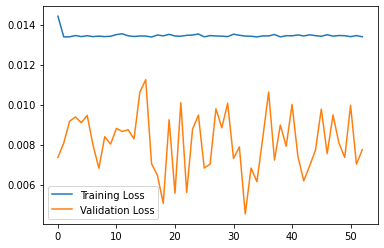

In [ ]:
#9. PLOT TRAINING LOSSES

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

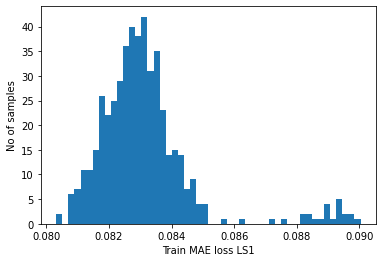

Train MAE loss LS1 error threshold:  0.09003901929855346


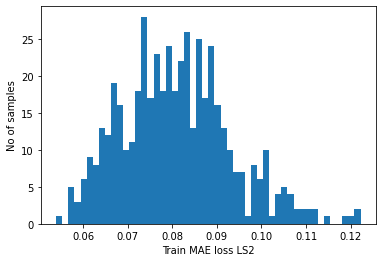

Train MAE loss LS2 error threshold:  0.12223901929855346


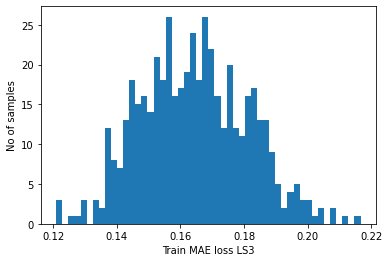

Train MAE loss LS3 error threshold:  0.21658901929855345


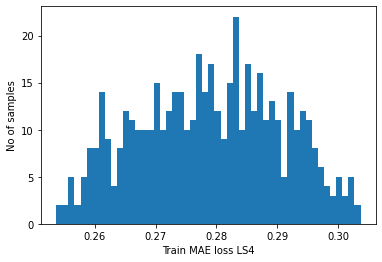

Train MAE loss LS4 error threshold:  0.3036890192985535


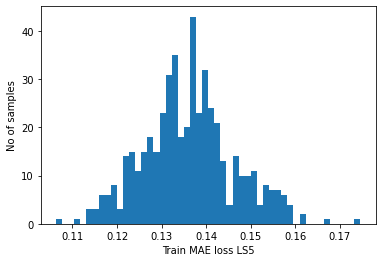

Train MAE loss LS5 error threshold:  0.17461401929855347


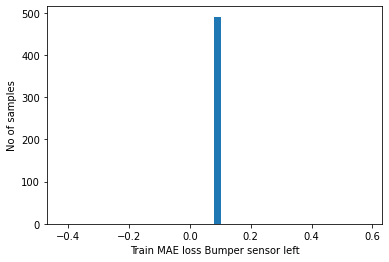

Train MAE loss Bumper error threshold:  0.08091098070144653


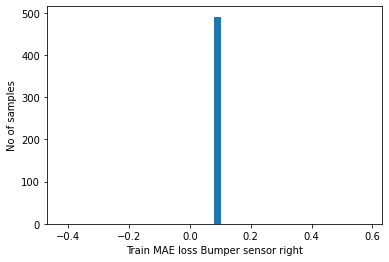

Train MAE loss Bumper error threshold:  0.08091098070144653


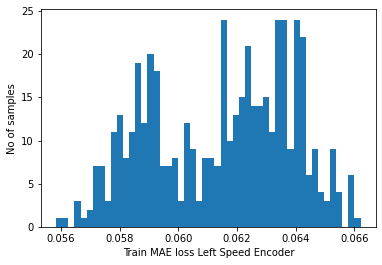

Train MAE loss left_speed_encoder_losses error threshold:  0.06621401929855346


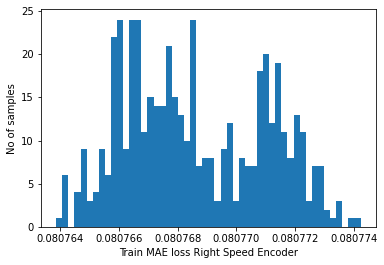

Train MAE loss Right Speed Encoder error threshold:  0.08077423070144653


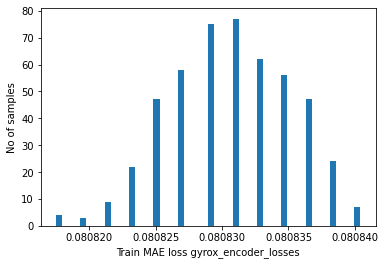

Train MAE loss gyrox_encoder_losses error threshold:  0.08084040880203247


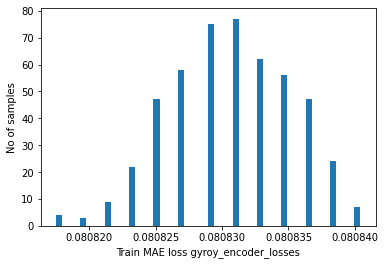

Train MAE loss gyroy_encoder_losses error threshold:  0.08084040880203247


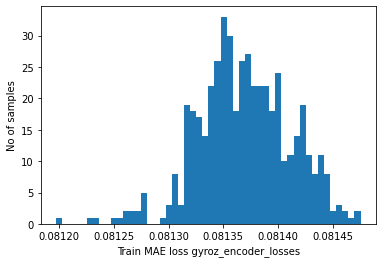

Train MAE loss gyroz_encoder_losses error threshold:  0.08147555589675903


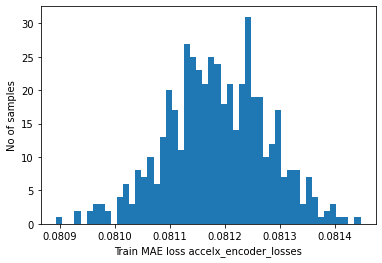

Train MAE loss accelx_encoder_losses error threshold:  0.08144694566726685


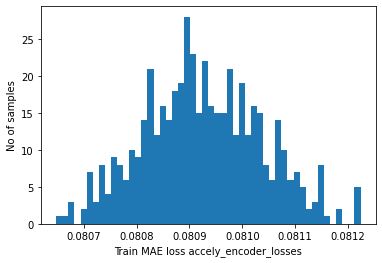

Train MAE loss accely_encoder_losses error threshold:  0.08122378587722778


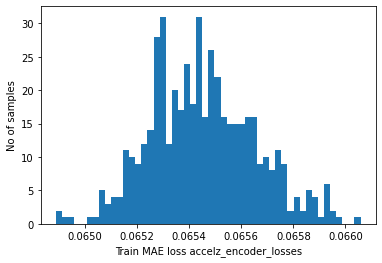

Train MAE loss accelz_encoder_losses error threshold:  0.0660584568977356


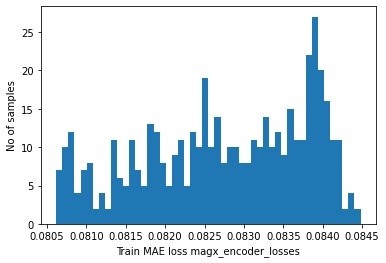

Train MAE loss magx_encoder_losses error threshold:  0.08447962999343872


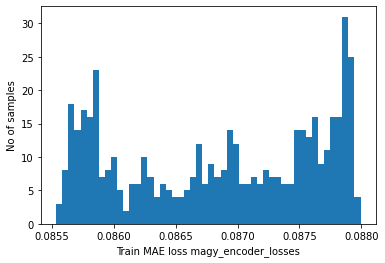

Train MAE loss magy_encoder_losses error threshold:  0.08799487352371216


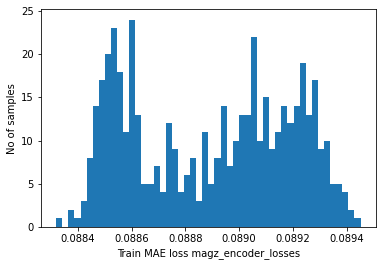

Train MAE loss magz_encoder_losses error threshold:  0.08945208787918091


In [ ]:
#10.  GET TRAINING LOSS THRESHOLD

#LEFT MOTOR LOSSES
line_sensor1_losses=[]
line_sensor2_losses=[]
line_sensor3_losses=[]
line_sensor4_losses=[]
line_sensor5_losses=[]

bumper_sensor_left_losses=[]
bumper_sensor_right_losses=[]

left_speed_encoder_losses=[]
right_speed_encoder_losses=[]

gyrox_encoder_losses=[]
gyroy_encoder_losses=[]
gyroz_encoder_losses=[]
accelx_encoder_losses=[]
accely_encoder_losses=[]
accelz_encoder_losses=[]
magx_encoder_losses=[]
magy_encoder_losses=[]
magz_encoder_losses=[]

#RIGHT MOTOR LOSSES

x_train_pred = model.predict(x_train)
x_train_pred.shape

mylosses= np.mean(np.abs(x_train_pred - x_train), axis=1)
split_losses=np.array_split(mylosses,18)

line_sensor1_losses=split_losses[0]
line_sensor2_losses=split_losses[1]
line_sensor3_losses=split_losses[2]
line_sensor4_losses=split_losses[3]
line_sensor5_losses=split_losses[4]

bumper_sensor_left_losses=split_losses[5]
bumper_sensor_right_losses=split_losses[6]

left_speed_encoder_losses=split_losses[7]
right_speed_encoder_losses=split_losses[8]

gyrox_encoder_losses=split_losses[9]
gyroy_encoder_losses=split_losses[10]
gyroz_encoder_losses=split_losses[11]
accelx_encoder_losses=split_losses[12]
accely_encoder_losses=split_losses[13]
accelz_encoder_losses=split_losses[14]
magx_encoder_losses=split_losses[15]
magy_encoder_losses=split_losses[16]
magz_encoder_losses=split_losses[17]

########################################################

plt.hist(line_sensor1_losses, bins=50)
plt.xlabel("Train MAE loss LS1")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor1_losses)
print("Train MAE loss LS1 error threshold: ", threshold)

plt.hist(line_sensor2_losses, bins=50)
plt.xlabel("Train MAE loss LS2")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor2_losses)
print("Train MAE loss LS2 error threshold: ", threshold)

plt.hist(line_sensor3_losses, bins=50)
plt.xlabel("Train MAE loss LS3")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor3_losses)
print("Train MAE loss LS3 error threshold: ", threshold)

plt.hist(line_sensor4_losses, bins=50)
plt.xlabel("Train MAE loss LS4")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor4_losses)
print("Train MAE loss LS4 error threshold: ", threshold)

plt.hist(line_sensor5_losses, bins=50)
plt.xlabel("Train MAE loss LS5")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor5_losses)
print("Train MAE loss LS5 error threshold: ", threshold)

########################################################

plt.hist(bumper_sensor_left_losses, bins=50)
plt.xlabel("Train MAE loss Bumper sensor left")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(bumper_sensor_left_losses)
print("Train MAE loss Bumper error threshold: ", threshold)

plt.hist(bumper_sensor_right_losses, bins=50)
plt.xlabel("Train MAE loss Bumper sensor right")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(bumper_sensor_right_losses)
print("Train MAE loss Bumper error threshold: ", threshold)

#########################################################

plt.hist(left_speed_encoder_losses, bins=50)
plt.xlabel("Train MAE loss Left Speed Encoder")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(left_speed_encoder_losses)
print("Train MAE loss left_speed_encoder_losses error threshold: ", threshold)

plt.hist(right_speed_encoder_losses, bins=50)
plt.xlabel("Train MAE loss Right Speed Encoder")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(right_speed_encoder_losses)
print("Train MAE loss Right Speed Encoder error threshold: ", threshold)

#########################################################

plt.hist(gyrox_encoder_losses, bins=50)
plt.xlabel("Train MAE loss gyrox_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyrox_encoder_losses)
print("Train MAE loss gyrox_encoder_losses error threshold: ", threshold)

plt.hist(gyroy_encoder_losses, bins=50)
plt.xlabel("Train MAE loss gyroy_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyroy_encoder_losses)
print("Train MAE loss gyroy_encoder_losses error threshold: ", threshold)

plt.hist(gyroz_encoder_losses, bins=50)
plt.xlabel("Train MAE loss gyroz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyroz_encoder_losses)
print("Train MAE loss gyroz_encoder_losses error threshold: ", threshold)

plt.hist(accelx_encoder_losses, bins=50)
plt.xlabel("Train MAE loss accelx_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accelx_encoder_losses)
print("Train MAE loss accelx_encoder_losses error threshold: ", threshold)

plt.hist(accely_encoder_losses, bins=50)
plt.xlabel("Train MAE loss accely_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accely_encoder_losses)
print("Train MAE loss accely_encoder_losses error threshold: ", threshold)

plt.hist(accelz_encoder_losses, bins=50)
plt.xlabel("Train MAE loss accelz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accelz_encoder_losses)
print("Train MAE loss accelz_encoder_losses error threshold: ", threshold)

plt.hist(magx_encoder_losses, bins=50)
plt.xlabel("Train MAE loss magx_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magx_encoder_losses)
print("Train MAE loss magx_encoder_losses error threshold: ", threshold)

plt.hist(magy_encoder_losses, bins=50)
plt.xlabel("Train MAE loss magy_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magy_encoder_losses)
print("Train MAE loss magy_encoder_losses error threshold: ", threshold)

plt.hist(magz_encoder_losses, bins=50)
plt.xlabel("Train MAE loss magz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magz_encoder_losses)
print("Train MAE loss magz_encoder_losses error threshold: ", threshold)





(1116, 1)


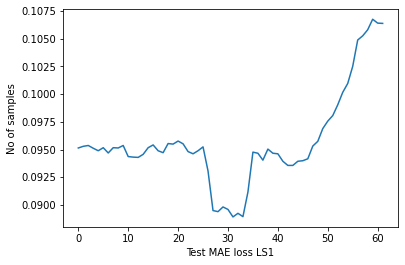

Test MAE loss LS1 error threshold:  0.10676401929855348


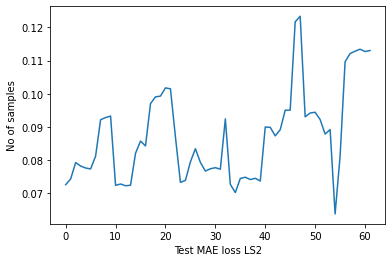

Test MAE loss LS2 error threshold:  0.12338901929855346


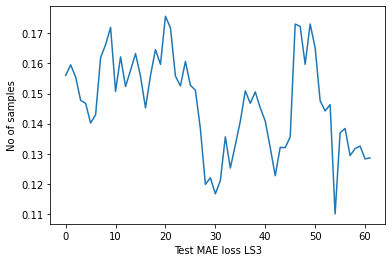

Test MAE loss LS3 error threshold:  0.17566401929855346


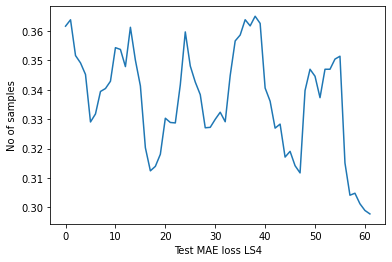

Test MAE loss LS4 error threshold:  0.36493901929855344


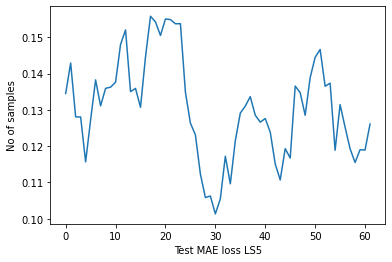

Test MAE loss LS5 error threshold:  0.15581401929855349


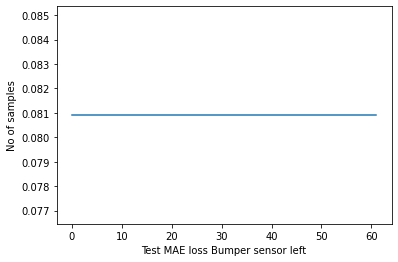

Test MAE loss Bumper error threshold:  0.08091098070144653


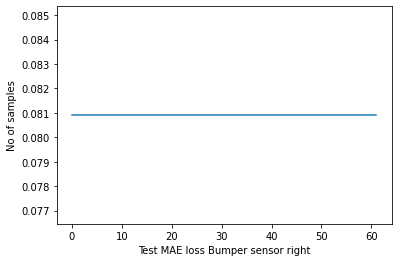

Test MAE loss Bumper error threshold:  0.08091098070144653


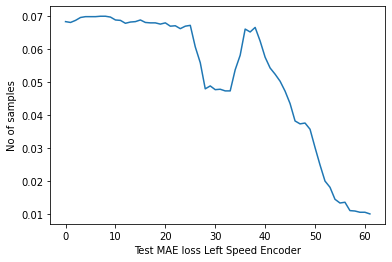

Test MAE loss left_speed_encoder_losses error threshold:  0.06983901929855346


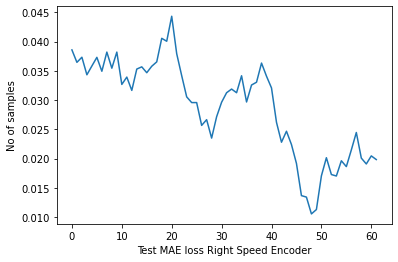

Test MAE loss Right Speed Encoder error threshold:  0.0443167644739151


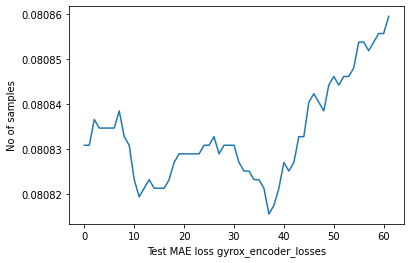

Test MAE loss gyrox_encoder_losses error threshold:  0.0808594822883606


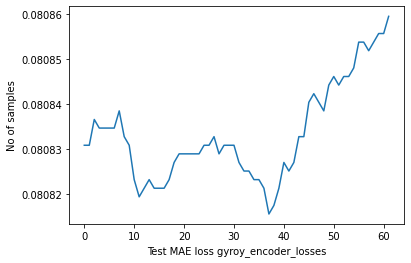

Test MAE loss gyroy_encoder_losses error threshold:  0.0808594822883606


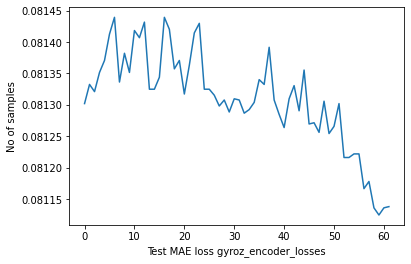

Test MAE loss gyroz_encoder_losses error threshold:  0.0814393162727356


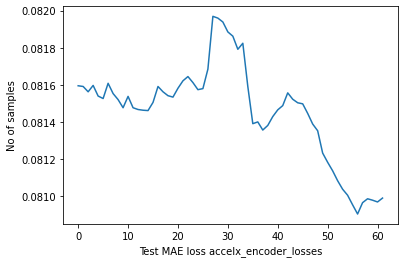

Test MAE loss accelx_encoder_losses error threshold:  0.08196955919265747


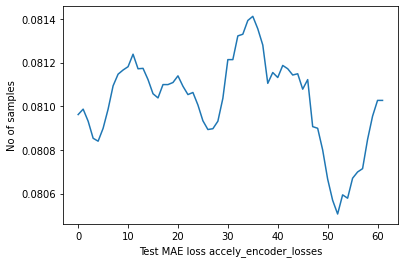

Test MAE loss accely_encoder_losses error threshold:  0.08141261339187622


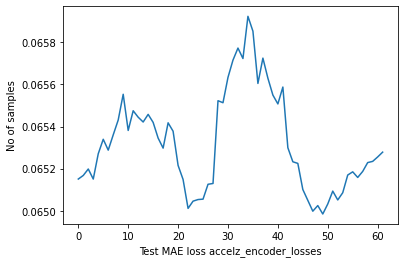

Test MAE loss accelz_encoder_losses error threshold:  0.06592303514480591


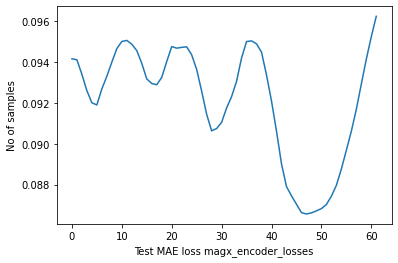

Test MAE loss magx_encoder_losses error threshold:  0.09625178575515747


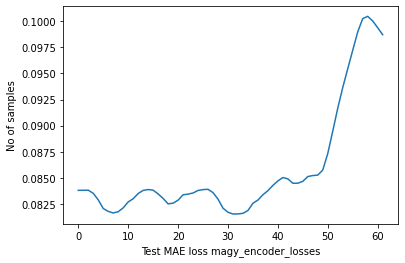

Test MAE loss magy_encoder_losses error threshold:  0.10044413805007935


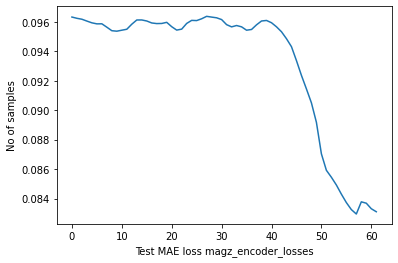

Test MAE loss magz_encoder_losses error threshold:  0.09638148546218872


In [ ]:
#11. GET TEST LOSSES

#LEFT MOTOR LOSSES

line_sensor1_losses2=[]
line_sensor2_losses2=[]
line_sensor3_losses2=[]
line_sensor4_losses2=[]
line_sensor5_losses2=[]

bumper_sensor_left_losses2=[]
bumper_sensor_right_losses2=[]

left_speed_encoder_losses2=[]
right_speed_encoder_losses2=[]

gyrox_encoder_losses2=[]
gyroy_encoder_losses2=[]
gyroz_encoder_losses2=[]
accelx_encoder_losses2=[]
accely_encoder_losses2=[]
accelz_encoder_losses2=[]
magx_encoder_losses2=[]
magy_encoder_losses2=[]
magz_encoder_losses2=[]

#RIGHT MOTOR LOSSES

y_train_pred = model.predict(y_train)
mylosses2= np.mean(np.abs(y_train_pred - y_train), axis=1)
print(mylosses2.shape)

split_losses2=np.array_split(mylosses2,18)

line_sensor1_losses2=split_losses2[0]
line_sensor2_losses2=split_losses2[1]
line_sensor3_losses2=split_losses2[2]
line_sensor4_losses2=split_losses2[3]
line_sensor5_losses2=split_losses2[4]

bumper_sensor_left_losses2=split_losses2[5]
bumper_sensor_right_losses2=split_losses2[6]

left_speed_encoder_losses2=split_losses2[7]
right_speed_encoder_losses2=split_losses2[8]

gyrox_encoder_losses2=split_losses2[9]
gyroy_encoder_losses2=split_losses2[10]
gyroz_encoder_losses2=split_losses2[11]
accelx_encoder_losses2=split_losses2[12]
accely_encoder_losses2=split_losses2[13]
accelz_encoder_losses2=split_losses2[14]
magx_encoder_losses2=split_losses2[15]
magy_encoder_losses2=split_losses2[16]
magz_encoder_losses2=split_losses2[17]

########################################################

plt.plot(line_sensor1_losses2)
plt.xlabel("Test MAE loss LS1")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor1_losses2)
print("Test MAE loss LS1 error threshold: ", threshold)

plt.plot(line_sensor2_losses2)
plt.xlabel("Test MAE loss LS2")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor2_losses2)
print("Test MAE loss LS2 error threshold: ", threshold)

plt.plot(line_sensor3_losses2)
plt.xlabel("Test MAE loss LS3")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor3_losses2)
print("Test MAE loss LS3 error threshold: ", threshold)

plt.plot(line_sensor4_losses2)
plt.xlabel("Test MAE loss LS4")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor4_losses2)
print("Test MAE loss LS4 error threshold: ", threshold)

plt.plot(line_sensor5_losses2)
plt.xlabel("Test MAE loss LS5")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(line_sensor5_losses2)
print("Test MAE loss LS5 error threshold: ", threshold)

########################################################

plt.plot(bumper_sensor_left_losses2)
plt.xlabel("Test MAE loss Bumper sensor left")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(bumper_sensor_left_losses2)
print("Test MAE loss Bumper error threshold: ", threshold)

plt.plot(bumper_sensor_right_losses2)
plt.xlabel("Test MAE loss Bumper sensor right")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(bumper_sensor_right_losses2)
print("Test MAE loss Bumper error threshold: ", threshold)

#########################################################

plt.plot(left_speed_encoder_losses2)
plt.xlabel("Test MAE loss Left Speed Encoder")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(left_speed_encoder_losses2)
print("Test MAE loss left_speed_encoder_losses error threshold: ", threshold)

plt.plot(right_speed_encoder_losses2)
plt.xlabel("Test MAE loss Right Speed Encoder")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(right_speed_encoder_losses2)
print("Test MAE loss Right Speed Encoder error threshold: ", threshold)

#########################################################

plt.plot(gyrox_encoder_losses2)
plt.xlabel("Test MAE loss gyrox_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyrox_encoder_losses2)
print("Test MAE loss gyrox_encoder_losses error threshold: ", threshold)

plt.plot(gyroy_encoder_losses2)
plt.xlabel("Test MAE loss gyroy_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyroy_encoder_losses2)
print("Test MAE loss gyroy_encoder_losses error threshold: ", threshold)

plt.plot(gyroz_encoder_losses2)
plt.xlabel("Test MAE loss gyroz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(gyroz_encoder_losses2)
print("Test MAE loss gyroz_encoder_losses error threshold: ", threshold)

plt.plot(accelx_encoder_losses2)
plt.xlabel("Test MAE loss accelx_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accelx_encoder_losses2)
print("Test MAE loss accelx_encoder_losses error threshold: ", threshold)

plt.plot(accely_encoder_losses2)
plt.xlabel("Test MAE loss accely_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accely_encoder_losses2)
print("Test MAE loss accely_encoder_losses error threshold: ", threshold)

plt.plot(accelz_encoder_losses2)
plt.xlabel("Test MAE loss accelz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(accelz_encoder_losses2)
print("Test MAE loss accelz_encoder_losses error threshold: ", threshold)

plt.plot(magx_encoder_losses2)
plt.xlabel("Test MAE loss magx_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magx_encoder_losses2)
print("Test MAE loss magx_encoder_losses error threshold: ", threshold)

plt.plot(magy_encoder_losses2)
plt.xlabel("Test MAE loss magy_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magy_encoder_losses2)
print("Test MAE loss magy_encoder_losses error threshold: ", threshold)

plt.plot(magz_encoder_losses2)
plt.xlabel("Test MAE loss magz_encoder_losses")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(magz_encoder_losses2)
print("Test MAE loss magz_encoder_losses error threshold: ", threshold)




In [ ]:
#12 PLOT ANOMALIES
threshold1 = np.max(line_sensor1_losses)
threshold2 = np.max(line_sensor1_losses2)
print("Line sensor1 data TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(line_sensor2_losses)
threshold2 = np.max(line_sensor2_losses2)
print("Line sensor2 data TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(line_sensor3_losses)
threshold2 = np.max(line_sensor3_losses2)
print("Line sensor3 data TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(line_sensor4_losses)
threshold2 = np.max(line_sensor4_losses2)
print("Line sensor4 data TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(line_sensor5_losses)
threshold2 = np.max(line_sensor5_losses2)
print("Line sensor5 data TRAIN,TEST : ", threshold1,threshold2)

################################################################################

threshold1 = np.max(bumper_sensor_left_losses)
threshold2 = np.max(bumper_sensor_left_losses2)
print("Bumper Sensor Left data TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(bumper_sensor_right_losses)
threshold2 = np.max(bumper_sensor_right_losses2)
print("Bumper Sensor Right data TRAIN,TEST : ", threshold1,threshold2)

#################################################################################

threshold1 = np.max(left_speed_encoder_losses)
threshold2 = np.max(left_speed_encoder_losses2)
print("Left Speed Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(right_speed_encoder_losses)
threshold2 = np.max(right_speed_encoder_losses2)
print("Right Speed Encoder TRAIN,TEST : ", threshold1,threshold2)

##################################################################################

threshold1 = np.max(accelx_encoder_losses)
threshold2 = np.max(accelx_encoder_losses2)
print("Accel x Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(accely_encoder_losses)
threshold2 = np.max(accely_encoder_losses2)
print("Accel y Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(accelz_encoder_losses)
threshold2 = np.max(accelz_encoder_losses2)
print("Accel z Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(gyrox_encoder_losses)
threshold2 = np.max(gyrox_encoder_losses2)
print("Gyro x Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(gyroy_encoder_losses)
threshold2 = np.max(gyroy_encoder_losses2)
print("Gyro y Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(gyroz_encoder_losses)
threshold2 = np.max(gyroz_encoder_losses2)
print("Gyro z Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(magx_encoder_losses)
threshold2 = np.max(magx_encoder_losses2)
print("Magnetometer x Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(magy_encoder_losses)
threshold2 = np.max(magy_encoder_losses2)
print("Magnetometer y Encoder TRAIN,TEST : ", threshold1,threshold2)

threshold1 = np.max(magz_encoder_losses)
threshold2 = np.max(magz_encoder_losses2)
print("Magnetometer z Encoder TRAIN,TEST : ", threshold1,threshold2)







        

Line sensor1 data TRAIN,TEST :  0.09003901929855346 0.10676401929855348
Line sensor2 data TRAIN,TEST :  0.12223901929855346 0.12338901929855346
Line sensor3 data TRAIN,TEST :  0.21658901929855345 0.17566401929855346
Line sensor4 data TRAIN,TEST :  0.3036890192985535 0.36493901929855344
Line sensor5 data TRAIN,TEST :  0.17461401929855347 0.15581401929855349
Bumper Sensor Left data TRAIN,TEST :  0.08091098070144653 0.08091098070144653
LBumper Sensor Right data TRAIN,TEST :  0.08091098070144653 0.08091098070144653
Left Speed Encoder TRAIN,TEST :  0.06621401929855346 0.06983901929855346
Right Speed Encoder TRAIN,TEST :  0.08077423070144653 0.0443167644739151
Accel x Encoder TRAIN,TEST :  0.08144694566726685 0.08196955919265747
Accel y Encoder TRAIN,TEST :  0.08122378587722778 0.08141261339187622
Accel z Encoder TRAIN,TEST :  0.0660584568977356 0.06592303514480591
Gyro x Encoder TRAIN,TEST :  0.08084040880203247 0.0808594822883606
Gyro y Encoder TRAIN,TEST :  0.08084040880203247 0.080859482